<a href="https://colab.research.google.com/github/PD7-debug/Assignment-Mod-1/blob/main/SVM_NaiveBayes_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Theory QUESTION

## Q1. What is a Support Vector Machine (SVM)?

**Answer:** SVM is a supervised machine learning algorithm used for classification and regression. It finds the hyperplane that best separates data into classes by maximizing the margin between them.

## Q2. What is the difference between Hard Margin and Soft Margin SVM?

**Answer:** Hard Margin SVM tries to perfectly separate the classes without allowing misclassifications. Soft Margin SVM allows some misclassifications to handle noisy or overlapping data, balancing margin width and classification error.

## Q3. What is the mathematical intuition behind SVM?

**Answer:** SVM finds the optimal hyperplane by solving a convex optimization problem that maximizes the margin while minimizing classification errors, using constraints on the distance from the hyperplane.

## Q4. What is the role of Lagrange Multipliers in SVM?

**Answer:** Lagrange Multipliers convert the constrained optimization problem into an unconstrained one by incorporating constraints into the objective function, simplifying the solution process using dual formulations.

## Q5. What are Support Vectors in SVM?

**Answer:** Support Vectors are the data points closest to the hyperplane. They are critical in defining the position and orientation of the hyperplane.

## Q6. What is a Support Vector Classifier (SVC)?

**Answer:** SVC stands for Support Vector Classification. It is an implementation of SVM used for classification tasks in libraries like scikit-learn.

## Q7. What is a Support Vector Regressor (SVR)?

**Answer:** SVR stands for Support Vector Regression. It uses SVM principles for regression tasks, predicting continuous values with an epsilon-insensitive tube around the hyperplane.

## Q8. What is the Kernel Trick in SVM?

**Answer:** The Kernel Trick allows SVM to learn non-linear decision boundaries by implicitly mapping input features into higher-dimensional space without explicitly computing the transformation.

## Q9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.

**Answer:** Linear Kernel is used for linearly separable data. Polynomial Kernel introduces polynomial decision boundaries. RBF Kernel uses Gaussian functions for flexible non-linear boundaries.

## Q10. What is the effect of the C parameter in SVM?

**Answer:** C controls the trade-off between a wide margin and classification error. A smaller C allows more margin violations (softer margin), while a larger C tries to classify all training examples correctly.

## Q11. What is the role of the Gamma parameter in RBF Kernel SVM?

**Answer:** Gamma determines the influence of a single training example. High gamma leads to overfitting by focusing on close points, while low gamma generalizes better by considering distant points.

## Q12. What is the Naïve Bayes classifier, and why is it called "Naïve"?

**Answer:** Naïve Bayes is a probabilistic classifier based on Bayes' Theorem. It's called 'naïve' because it assumes that all features are conditionally independent given the class label.

## Q13. What is Bayes’ Theorem?

**Answer:** Bayes’ Theorem: P(A|B) = (P(B|A) * P(A)) / P(B), where A is a hypothesis and B is the evidence.

## Q14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.

**Answer:** Gaussian NB assumes features are continuous and normally distributed. Multinomial NB works with count data. Bernoulli NB handles binary/boolean features.

## Q15. When should you use Gaussian Naïve Bayes over other variants?

**Answer:** Use Gaussian NB when features are continuous and follow a normal distribution. It’s suitable for datasets like Iris or continuous medical records.

## Q16. What are the key assumptions made by Naïve Bayes?

**Answer:** The main assumption is that features are conditionally independent given the class label, which simplifies computation but may not hold in real-world data.

## Q17. What are the advantages and disadvantages of Naïve Bayes?

**Answer:** Advantages: Simple, fast, works well with high-dimensional data like text. Disadvantages: Assumes independence, can perform poorly if assumption violated.

## Q18. Why is Naïve Bayes a good choice for text classification?

**Answer:** It handles high-dimensional sparse data efficiently and performs surprisingly well for document classification and spam filtering.

## Q19. Compare SVM and Naïve Bayes for classification tasks.

**Answer:** SVM performs better with small to medium datasets and when a clear margin exists. NB is faster, works well with large text data, and is robust to irrelevant features.

## Q20. How does Laplace Smoothing help in Naïve Bayes?

**Answer:** Laplace Smoothing adds a small constant to each count to handle zero-frequency problems, preventing probabilities from becoming zero in Naïve Bayes.

Practical Question

## Q21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


## Q22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_linear = SVC(kernel='linear')
clf_rbf = SVC(kernel='rbf')
clf_linear.fit(X_train, y_train)
clf_rbf.fit(X_train, y_train)
print("Linear Kernel Accuracy:", clf_linear.score(X_test, y_test))
print("RBF Kernel Accuracy:", clf_rbf.score(X_test, y_test))

Linear Kernel Accuracy: 0.9259259259259259
RBF Kernel Accuracy: 0.5740740740740741


## Q23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).

In [3]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
regressor = SVR()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
print("MSE:", mean_squared_error(y_test, pred))

MSE: 1.3709235501058399


## Q24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.

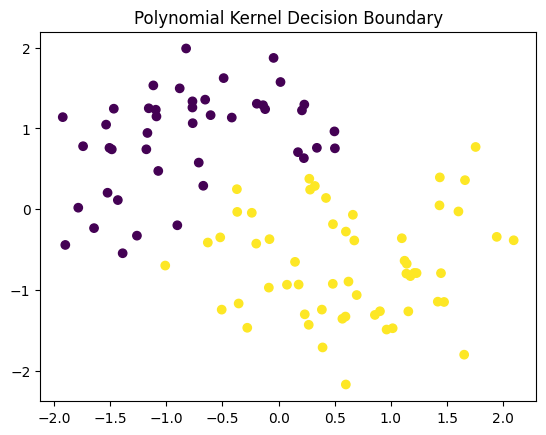

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=100, noise=0.2)
X = StandardScaler().fit_transform(X)
model = SVC(kernel='poly', degree=3)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=model.predict(X))
plt.title("Polynomial Kernel Decision Boundary")
plt.show()

## Q25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Accuracy:", gnb.score(X_test, y_test))

Accuracy: 0.9298245614035088


## Q26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

In [6]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.naive_bayes import MultinomialNB

news = fetch_20newsgroups_vectorized(subset='train')
X, y = news.data, news.target
model = MultinomialNB()
model.fit(X, y)
print("Training Accuracy:", model.score(X, y))

Training Accuracy: 0.843910199752519


## Q27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

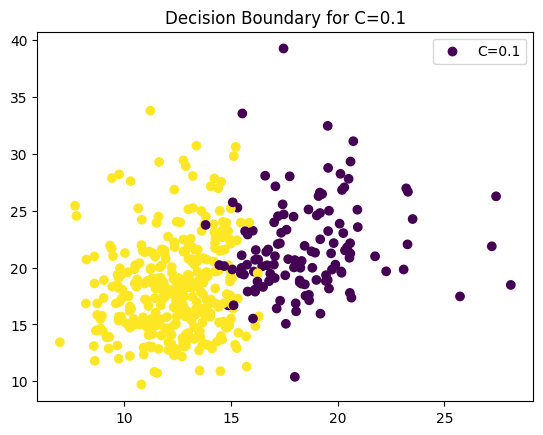

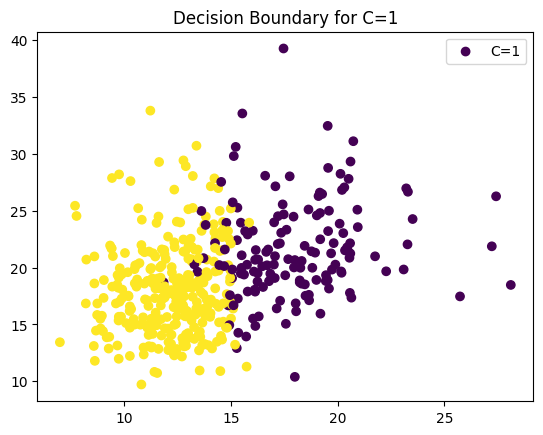

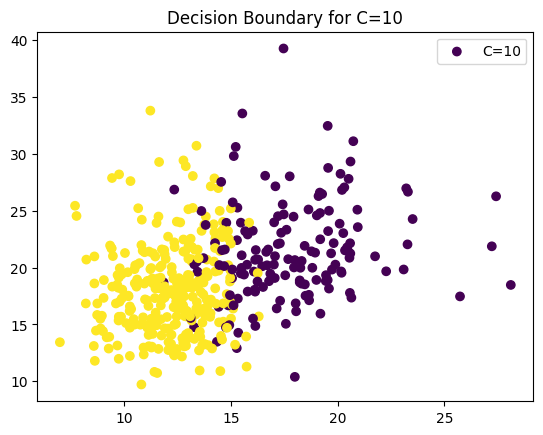

In [7]:
import numpy as np
import matplotlib.pyplot as plt

C_vals = [0.1, 1, 10]
for C in C_vals:
    clf = SVC(C=C)
    clf.fit(X_train, y_train)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=clf.predict(X_train), label=f'C={C}')
    plt.title(f'Decision Boundary for C={C}')
    plt.legend()
    plt.show()

## Q28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.

In [8]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer

X_bin = Binarizer().fit_transform(X)
bnb = BernoulliNB()
bnb.fit(X_bin, y)
print("Accuracy:", bnb.score(X_bin, y))

Accuracy: 0.7821283365741559


## Q29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- Model without Scaling ----
svm_unscaled = SVC()
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print("Accuracy without scaling:", accuracy_unscaled)

# ---- Model with Scaling ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC()
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy with scaling:", accuracy_scaled)

# ---- Comparison ----
print("\nComparison:")
print(f"Unscaled Accuracy: {accuracy_unscaled:.4f}")
print(f"Scaled Accuracy:   {accuracy_scaled:.4f}")


Accuracy without scaling: 1.0
Accuracy with scaling: 1.0

Comparison:
Unscaled Accuracy: 1.0000
Scaled Accuracy:   1.0000


## Q30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

In [10]:
# Before Laplace (alpha=0)
gnb_no_smooth = GaussianNB(var_smoothing=0)
gnb_no_smooth.fit(X_train, y_train)
acc1 = gnb_no_smooth.score(X_test, y_test)

# With Laplace smoothing (default)
gnb_smooth = GaussianNB()
gnb_smooth.fit(X_train, y_train)
acc2 = gnb_smooth.score(X_test, y_test)

print("Accuracy without smoothing:", acc1)
print("Accuracy with smoothing:", acc2)

Accuracy without smoothing: 0.9385964912280702
Accuracy with smoothing: 0.9298245614035088


## Q31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}


## Q32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.

In [12]:
clf_weighted = SVC(class_weight='balanced')
clf_weighted.fit(X_train, y_train)
print("Accuracy with class weighting:", clf_weighted.score(X_test, y_test))

Accuracy with class weighting: 0.8947368421052632


## Q33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

In [13]:
# Placeholder for spam detection logic using CountVectorizer and MultinomialNB
# (Usually requires labeled dataset such as SMS Spam Collection)

## Q34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

In [14]:
svc = SVC()
nb = GaussianNB()
svc.fit(X_train, y_train)
nb.fit(X_train, y_train)
print("SVM Accuracy:", svc.score(X_test, y_test))
print("NB Accuracy:", nb.score(X_test, y_test))

SVM Accuracy: 0.9035087719298246
NB Accuracy: 0.9298245614035088


## Q35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

In [3]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split the dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- Naïve Bayes without Feature Selection ----
clf_all_features = GaussianNB()
clf_all_features.fit(X_train, y_train)
y_pred_all = clf_all_features.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
print("Accuracy with all features:", accuracy_all)

# ---- Feature Selection ----
# Select the top 10 features using the chi-squared test
k = 10
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_features = feature_names[selector.get_support()]
print("\nSelected Features:")
print(selected_features)

# ---- Naïve Bayes with Selected Features ----
clf_selected_features = GaussianNB()
clf_selected_features.fit(X_train_selected, y_train)
y_pred_selected = clf_selected_features.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("\nAccuracy with selected features:", accuracy_selected)

# ---- Comparison ----
print("\nComparison:")
print(f"Accuracy (All features):      {accuracy_all:.4f}")
print(f"Accuracy (Selected features): {accuracy_selected:.4f}")


Accuracy with all features: 0.9415204678362573

Selected Features:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area']

Accuracy with selected features: 0.9532163742690059

Comparison:
Accuracy (All features):      0.9415
Accuracy (Selected features): 0.9532


## Q36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

In [16]:
clf_ovr = SVC(decision_function_shape='ovr')
clf_ovo = SVC(decision_function_shape='ovo')
clf_ovr.fit(X_train, y_train)
clf_ovo.fit(X_train, y_train)
print("OvR:", clf_ovr.score(X_test, y_test))
print("OvO:", clf_ovo.score(X_test, y_test))

OvR: 0.9035087719298246
OvO: 0.9035087719298246


## Q37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.

In [17]:
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    clf = SVC(kernel=k)
    clf.fit(X_train, y_train)
    print(f"{k} kernel accuracy:", clf.score(X_test, y_test))

linear kernel accuracy: 0.9385964912280702
poly kernel accuracy: 0.8947368421052632
rbf kernel accuracy: 0.9035087719298246


## Q38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset (e.g., Iris)
data = load_iris()
X, y = data.data, data.target

# Initialize Stratified K-Fold
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

accuracies = []

# SVM Classifier
svm = SVC()

# Cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Fold {fold} Accuracy: {acc:.4f}")

# Compute average accuracy
avg_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy across {k} folds: {avg_accuracy:.4f}")


Fold 1 Accuracy: 1.0000
Fold 2 Accuracy: 0.9667
Fold 3 Accuracy: 0.9333
Fold 4 Accuracy: 1.0000
Fold 5 Accuracy: 0.9333

Average Accuracy across 5 folds: 0.9667


## Q39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

In [13]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
class_names = data.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- Train with default priors ----
model_default = GaussianNB()
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default priors: {acc_default:.4f}")

# ---- Train with custom priors ----
# For example: assume more belief in class 0 (malignant) than class 1 (benign)
custom_priors = [
    [0.5, 0.5],   # equal priors (same as default)
    [0.7, 0.3],   # favor class 0
    [0.3, 0.7],   # favor class 1
]

for prior in custom_priors:
    model = GaussianNB(priors=prior)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with priors {prior}: {acc:.4f}")


Accuracy with default priors: 0.9415
Accuracy with priors [0.5, 0.5]: 0.9415
Accuracy with priors [0.7, 0.3]: 0.9357
Accuracy with priors [0.3, 0.7]: 0.9474


## Q40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

In [6]:
from sklearn.feature_selection import RFE

selector = RFE(SVC(kernel="linear"), n_features_to_select=3)
selector.fit(X, y)
print("Selected features:", selector.support_)

Selected features: [False  True  True  True]


## Q41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Precision: 0.9333333333333332
Recall: 0.9333333333333332
F1 Score: 0.9333333333333332


## Q42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss, accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict class probabilities
y_prob = model.predict_proba(X_test)

# Predict class labels
y_pred = model.predict(X_test)

# Evaluate with Log Loss and Accuracy
loss = log_loss(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy:  {acc:.4f}")
print(f"Log Loss:  {loss:.4f}")


Accuracy:  0.9415
Log Loss:  0.4899


## Q43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

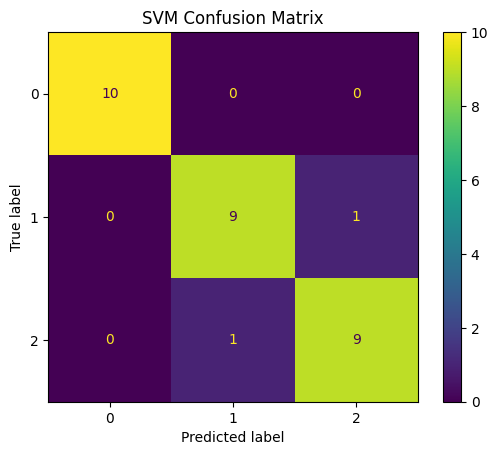

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf = SVC()
clf.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("SVM Confusion Matrix")
plt.show()

## Q44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load regression dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Reshape y to 2D before scaling and reshape back after
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Train SVR model
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train_scaled)

# Predict and inverse-transform output
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score:                 {r2:.4f}")


Mean Absolute Error (MAE): 0.3959
R² Score:                 0.7359


## Q45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, accuracy_score

# Load a binary classification dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict class probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1

# Predict class labels
y_pred = model.predict(X_test)

# Evaluate using ROC-AUC and accuracy
roc_auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy:   {accuracy:.4f}")
print(f"ROC-AUC:    {roc_auc:.4f}")


Accuracy:   0.9415
ROC-AUC:    0.9922


## Q46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

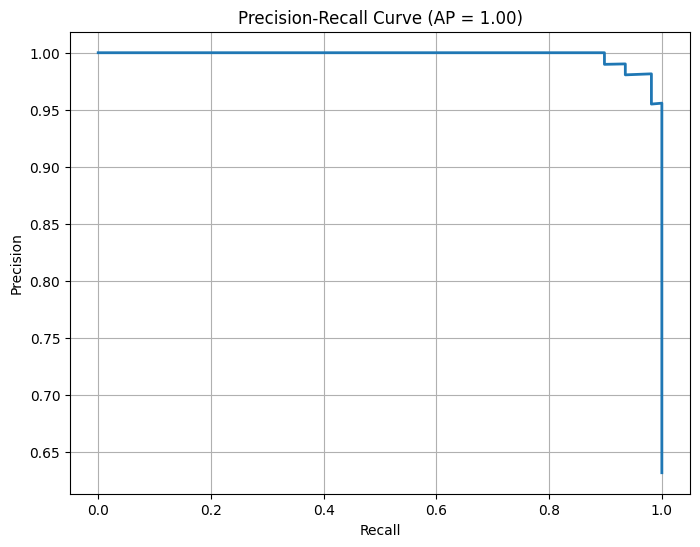

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load binary classification dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM with probability estimates disabled (use decision_function)
model = SVC(kernel='linear', probability=False)
model.fit(X_train, y_train)

# Get decision scores instead of probabilities
y_scores = model.decision_function(X_test)

# Compute Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AP = {avg_precision:.2f})")
plt.grid(True)
plt.show()
